In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# training set preparation

In [0]:
feature = [[[(i+j)] for i in range(5)] for j in range(100)]
target = [(i+5) for i in range(100)]

In [29]:
feature = np.array(feature, dtype=float)
target = np.array(target, dtype=float)

print(target)
print(feature[98:,:,:])

[  5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.
  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.
  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.
  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102.
 103. 104.]
[[[ 98.]
  [ 99.]
  [100.]
  [101.]
  [102.]]

 [[ 99.]
  [100.]
  [101.]
  [102.]
  [103.]]]


### normalization of the input is needed

In [30]:
feature = feature/100
target = target/100

print(target)
print(feature[98:,:,:])

[0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18
 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32
 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46
 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6
 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74
 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88
 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02
 1.03 1.04]
[[[0.98]
  [0.99]
  [1.  ]
  [1.01]
  [1.02]]

 [[0.99]
  [1.  ]
  [1.01]
  [1.02]
  [1.03]]]


In [32]:
print(feature.shape)
print(target.shape)

(100, 5, 1)
(100,)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 5, 1)
(20, 5, 1)
(80,)
(20,)


### batch_input_shape = batch_size, timestamp, data_dim

In [34]:
model = Sequential()
model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

W0621 15:58:52.107197 140359198967680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 15:58:52.160257 140359198967680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 15:58:52.167212 140359198967680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 15:58:52.389448 140359198967680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 50 to 100 to 200
history = model.fit(x_train, y_train, epochs=400, validation_split=0.10)

W0621 15:59:00.484411 140359198967680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0621 15:59:00.884555 140359198967680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0621 15:59:01.073270 140359198967680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 72 samples, validate on 8 samples
Epoch 1/400
72/72 [==============================] - 4s 60ms/step - loss: 0.5088 - acc: 0.0000e+00 - val_loss: 0.5321 - val_acc: 0.0000e+00
Epoch 2/400
72/72 [==============================] - 0s 516us/step - loss: 0.5064 - acc: 0.0000e+00 - val_loss: 0.5297 - val_acc: 0.0000e+00
Epoch 3/400
72/72 [==============================] - 0s 535us/step - loss: 0.5040 - acc: 0.0000e+00 - val_loss: 0.5272 - val_acc: 0.0000e+00
Epoch 4/400
72/72 [==============================] - 0s 531us/step - loss: 0.5016 - acc: 0.0000e+00 - val_loss: 0.5247 - val_acc: 0.0000e+00
Epoch 5/400
72/72 [==============================] - 0s 575us/step - loss: 0.4991 - acc: 0.0000e+00 - val_loss: 0.5221 - val_acc: 0.0000e+00
Epoch 6/400
72/72 [==============================] - 0s 546us/step - loss: 0.4966 - acc: 0.0000e+00 - val_loss: 0.5196 - val_acc: 0.0000e+00
Epoch 7/400
72/72 [==============================] - 0s 565us/step - loss: 0.4941 - acc: 0.0000e+00 - val_loss: 

In [0]:
results = model.predict(x_test)

In [37]:
x_test.shape

(20, 5, 1)

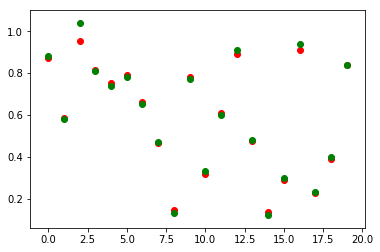

In [38]:
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

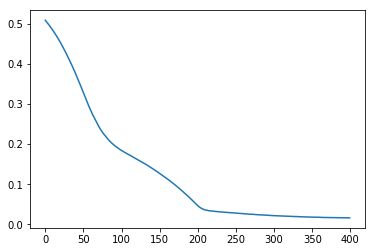

In [39]:
plt.plot(history.history['loss'])
plt.show()

In [0]:
test_input = [[[10], [11], [12], [13], [14]]]
norm_test_input = np.array(test_input, dtype=float)
norm_test_input = norm_test_input/100
results = model.predict(norm_test_input)

In [0]:
print(results*100)

[[14.86734]]
